# Train-Validation

In [207]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from paretoset import paretoset
import numpy as np

In [208]:
percentages = [2.5, 5, 25, 50, 75, 100, 200]

# RQ1

Table

In [209]:
max_df = pd.read_csv('hs_max.csv')
nor_df = pd.read_csv('TV_no_reducer_scores.csv')

In [210]:
max_reordered = max_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T
nor_reordered = nor_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T

In [211]:
max_reordered

dataset,kuhar,motionsense,realworld_thigh,realworld_waist,uci,wisdm
model,,,,,,
ae,0.688263,0.792857,0.681823,0.840723,0.820588,0.773898
convae,0.784038,0.807143,0.756203,0.838673,0.835294,0.812797
convtae,0.784742,0.816667,0.784574,0.840345,0.843235,0.827966
tae,0.687559,0.700714,0.657497,0.798813,0.792647,0.769237
umap,0.429577,0.657857,0.598220,0.653182,0.776471,0.643136


In [212]:
nor_reordered

dataset,kuhar,motionsense,realworld_thigh,realworld_waist,uci,wisdm
model,,,,,,
no_reducer,0.671127,0.785952,0.671521,0.787217,0.847059,0.747373


In [213]:
data = pd.concat([nor_reordered, max_reordered])
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))

\begin{tabular}{lrrrrrr}
\hline
 model      &   kuhar &   motionsense &   realworld\_thigh &   realworld\_waist &   uci &   wisdm \\
\hline
 no\_reducer &    0.67 &          0.79 &              0.67 &              0.79 &  0.85 &    0.75 \\
 ae         &    0.69 &          0.79 &              0.68 &              0.84 &  0.82 &    0.77 \\
 convae     &    0.78 &          0.81 &              0.76 &              0.84 &  0.84 &    0.81 \\
 convtae    &    0.78 &          0.82 &              0.78 &              0.84 &  0.84 &    0.83 \\
 tae        &    0.69 &          0.70 &              0.66 &              0.80 &  0.79 &    0.77 \\
 umap       &    0.43 &          0.66 &              0.60 &              0.65 &  0.78 &    0.64 \\
\hline
\end{tabular}


## Pareto

In [214]:
all_df = pd.read_csv('hs_all.csv')

This plot demonstrate how paretoset works 

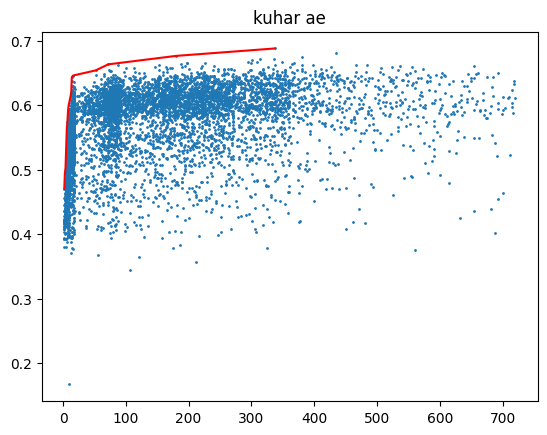

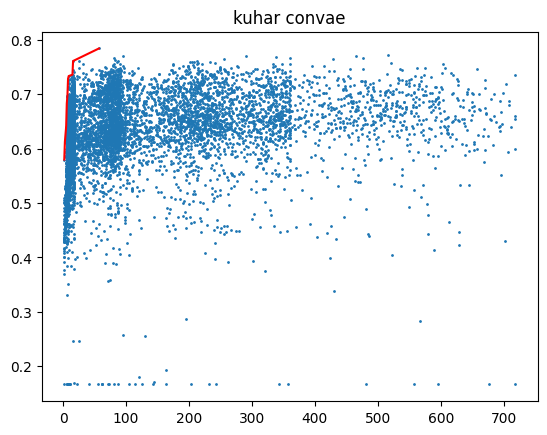

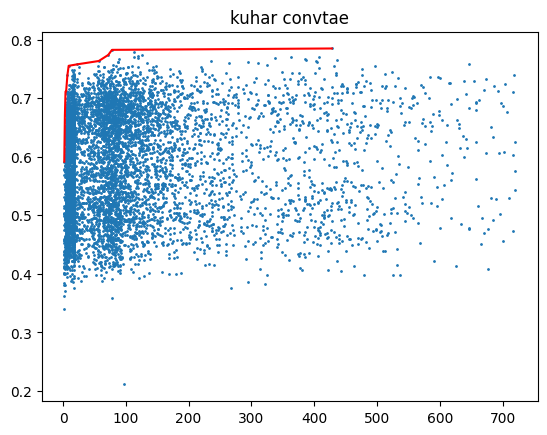

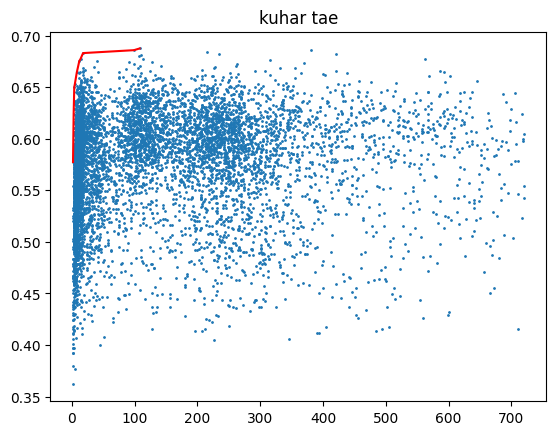

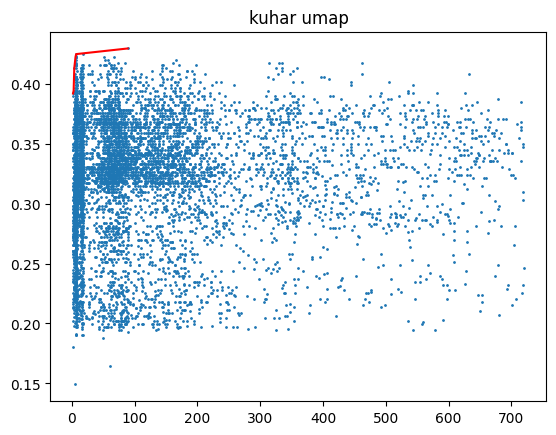

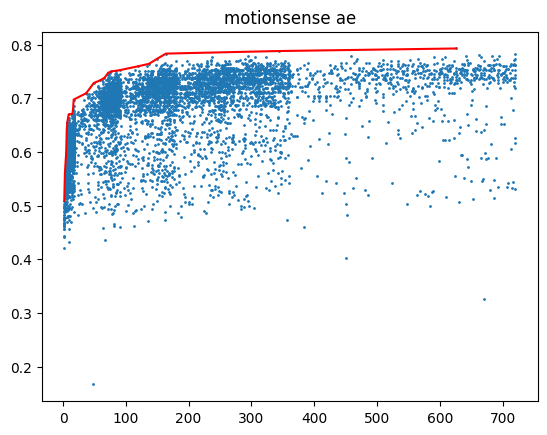

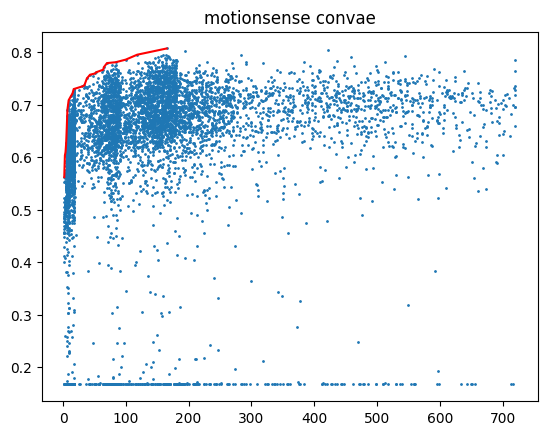

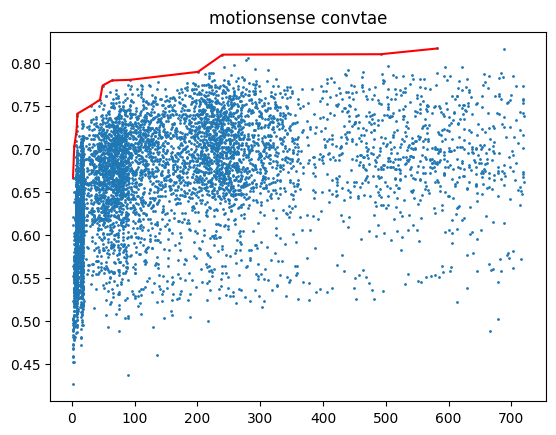

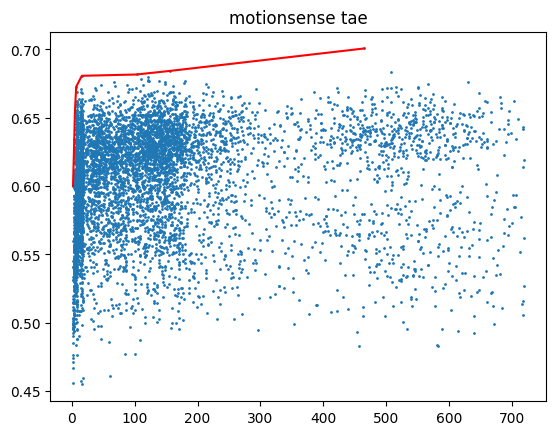

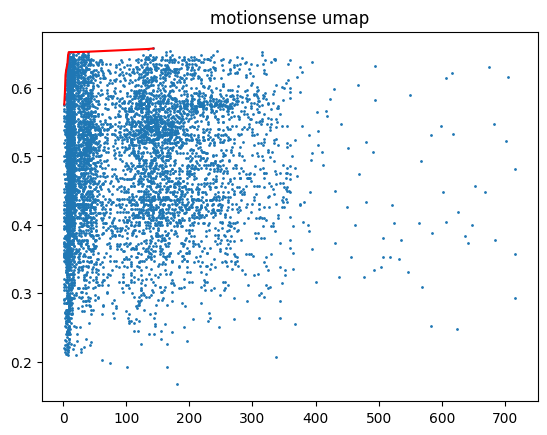

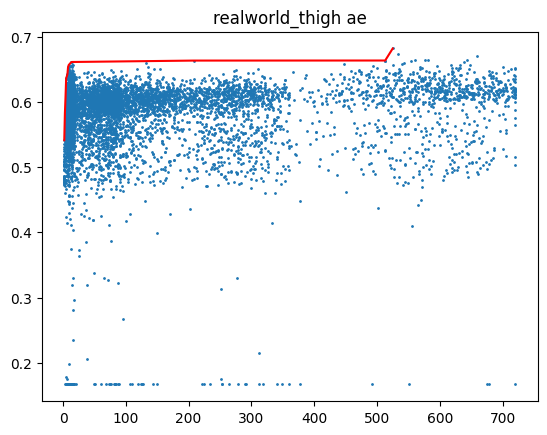

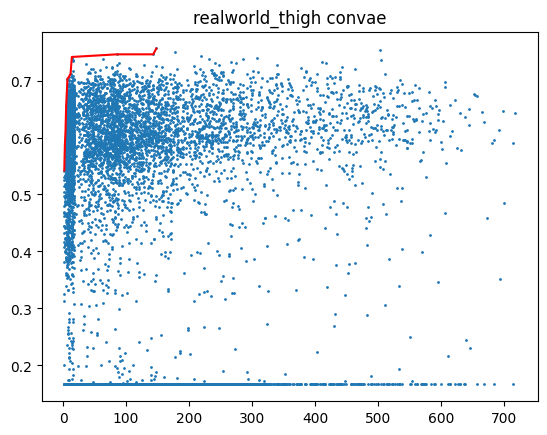

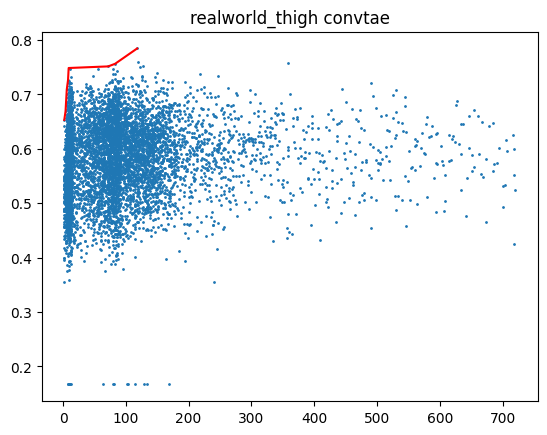

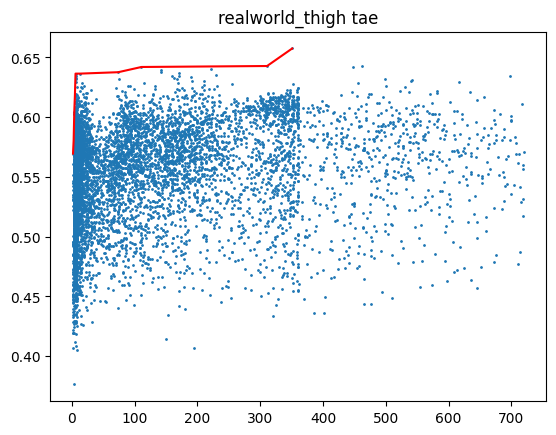

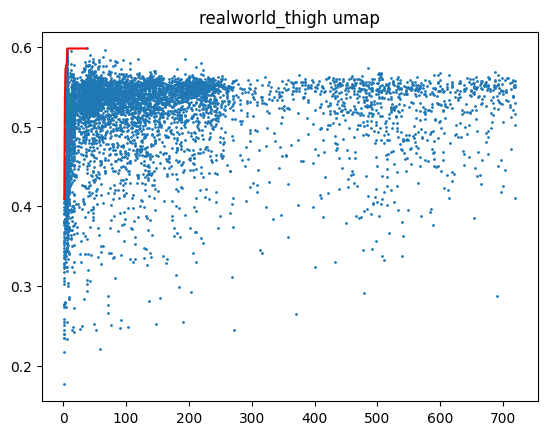

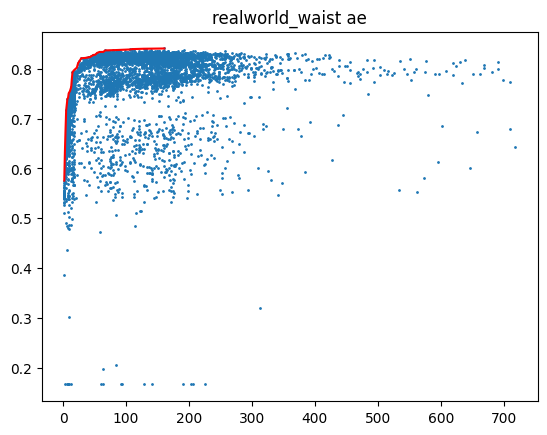

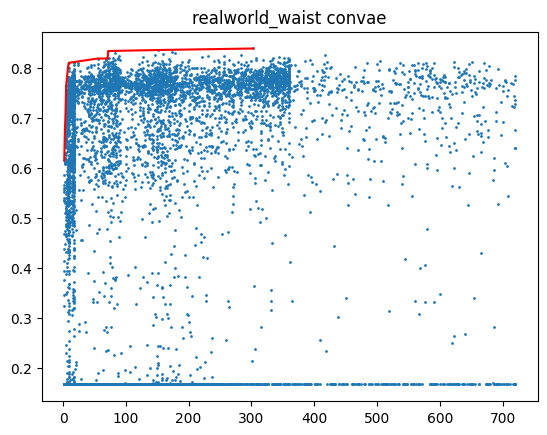

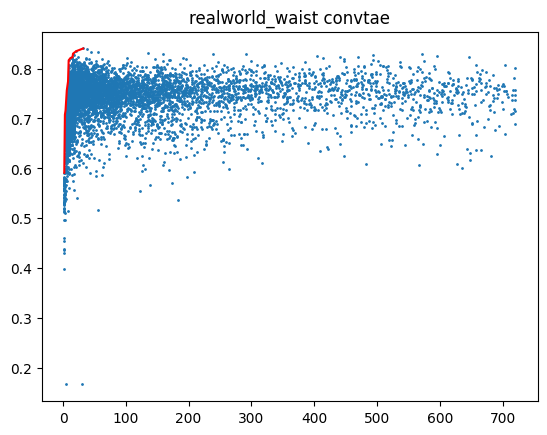

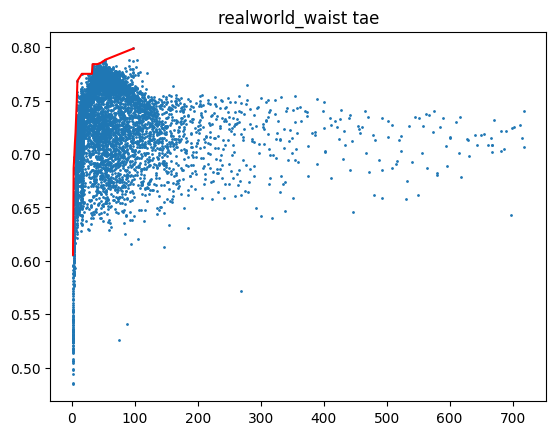

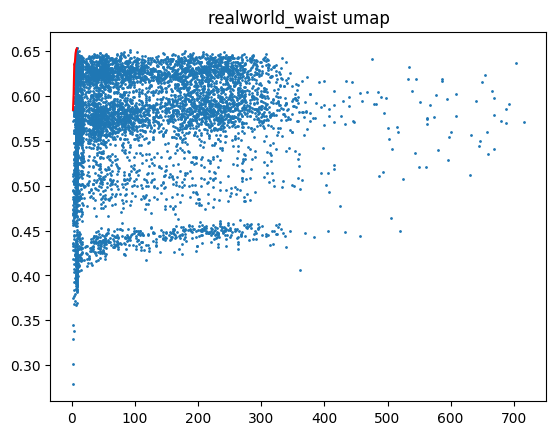

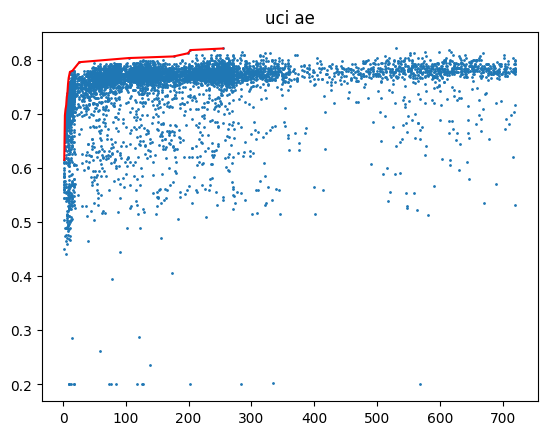

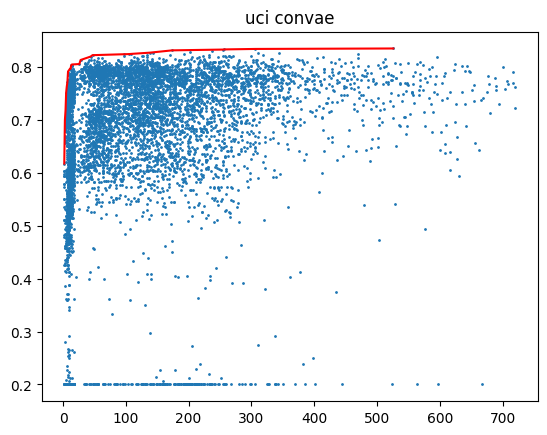

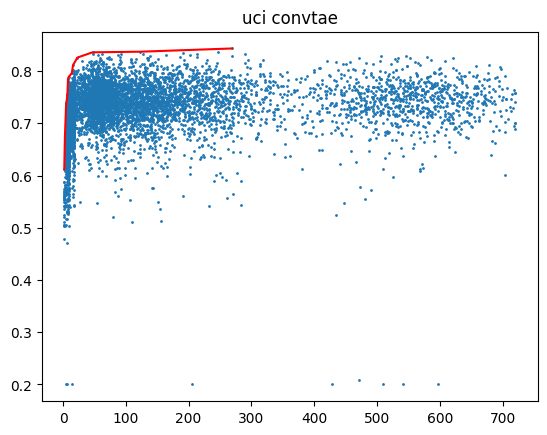

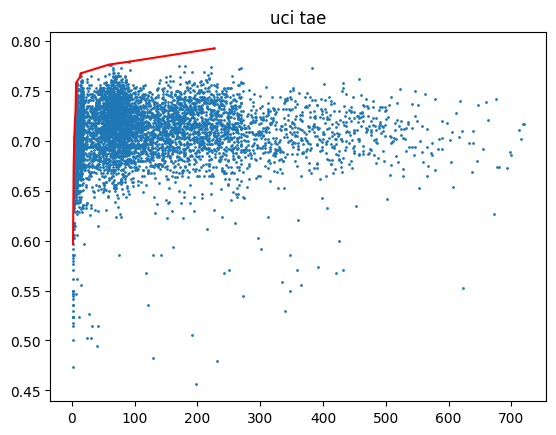

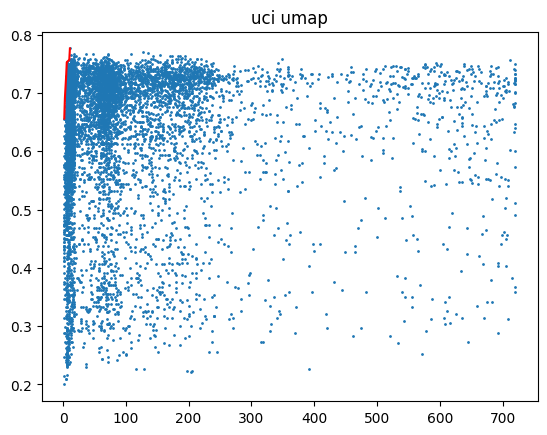

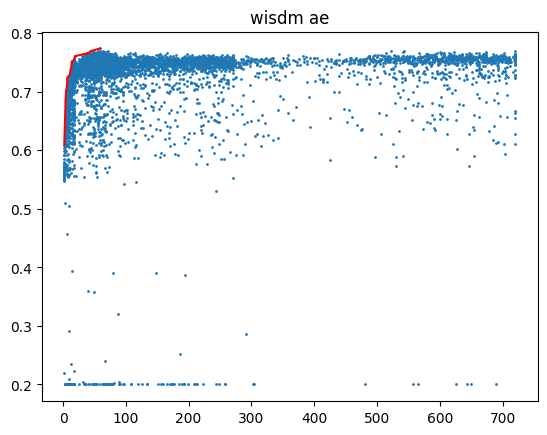

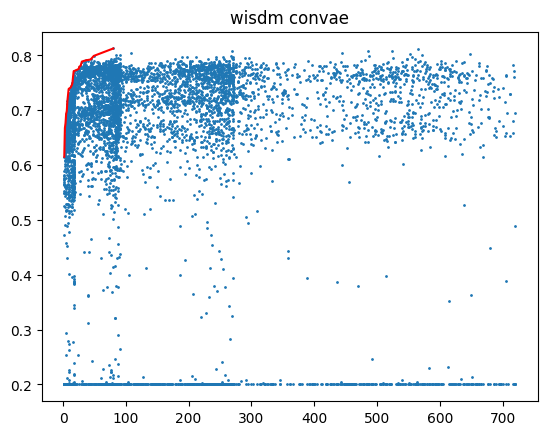

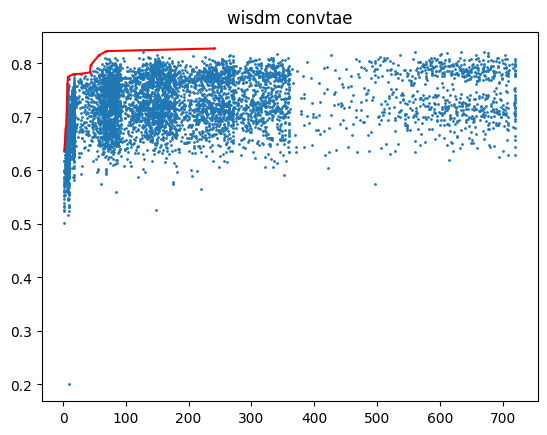

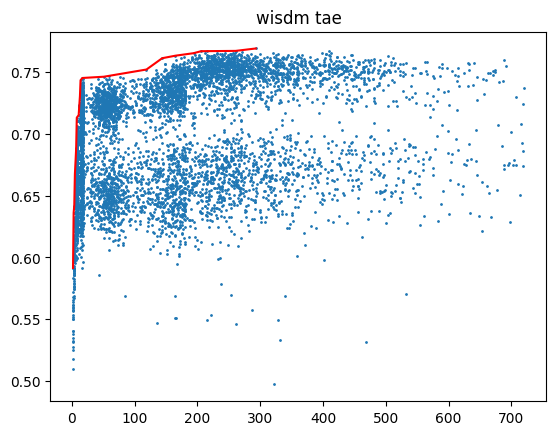

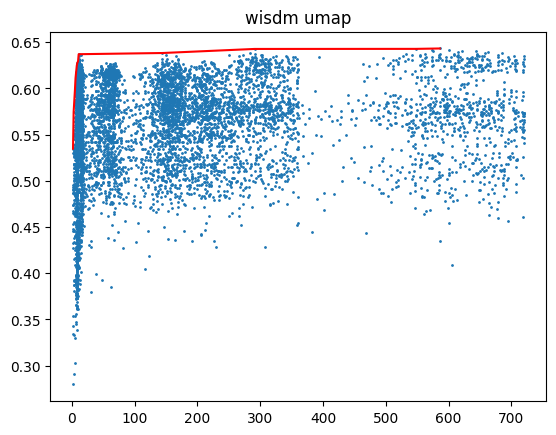

In [215]:
for (dataset, model), group in all_df.groupby(['dataset', 'model']):
    mask = paretoset(group[['dim', 'score']], sense=['min', 'max'])
    pareto_plt = group[mask].sort_values('dim')
    plt.plot(pareto_plt['dim'], pareto_plt['score'], label=model, color='red')
    plt.title(dataset + ' ' + model)
    plt.scatter(group['dim'],group['score'], label=model, s=1)
    plt.show()

Now, only pareto plots

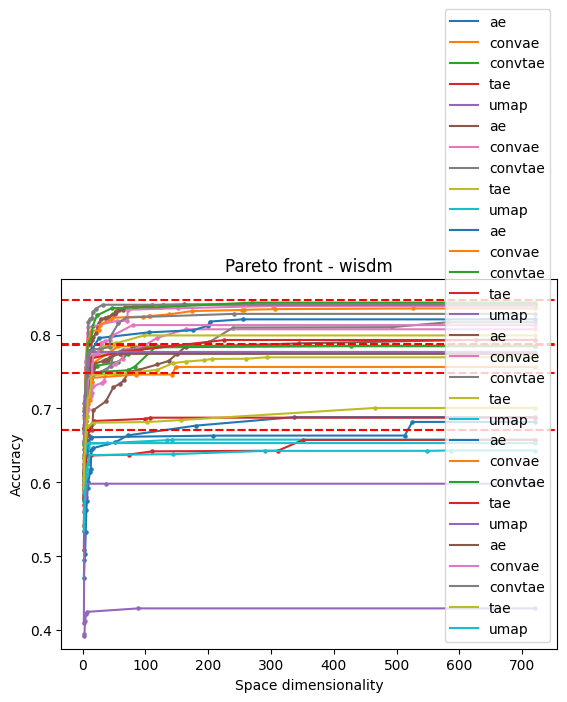

In [216]:

for index, ((dataset, model), group) in enumerate(all_df.groupby(['dataset', 'model'])):
    
    mask = paretoset(group[['dim', 'score']], sense=['min', 'max'])
    pareto_plt = group[mask].sort_values('dim')[['dim', 'score']].reset_index(drop=True)
    pareto_plt.loc[len(pareto_plt), :] = [720, pareto_plt.iloc[-1, -1]]
    # To confirm that the last point is the same as the second last point
    # print(pareto_plt.iloc[-2:]['score'])
    plt.plot(pareto_plt['dim'], pareto_plt['score'], label=model)
    plt.scatter(pareto_plt['dim'], pareto_plt['score'], s=5)
    if index % 5 == 4:
        
        plt.title('Pareto front - ' + dataset)
        plt.ylim(0.375, 0.875)
        plt.xlabel('Space dimensionality')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.grid()
        # Now plotting the red line for no reducer value
        # print()
        plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,dataset], color='red', linestyle='--')
        # plt.show()
        plt.savefig('pareto-' + dataset + '.png', dpi=300)

## Comparing TAE vs AE

In [217]:
all_df

,dataset,model,percent,dim,score
0,kuhar,umap,2.5,3,0.197887
1,kuhar,umap,2.5,8,0.335681
2,kuhar,umap,2.5,4,0.230751
3,kuhar,umap,2.5,8,0.272300
4,kuhar,umap,2.5,4,0.208920
...,...,...,...,...,...
211578,realworld_waist,convtae,200.0,509,0.757821
211579,realworld_waist,convtae,200.0,540,0.730798
211580,realworld_waist,convtae,200.0,585,0.778263
211581,realworld_waist,convtae,200.0,560,0.698706


In [218]:
ae_df = all_df[(all_df['model'] == 'ae')]
tae_df = all_df[(all_df['model'] == 'tae')]

In [219]:
colors = {
    'ae': 'blue',
    'convae': 'orange',
    'convtae': 'green',
    'tae': 'red',
    'umap': 'purple'
}

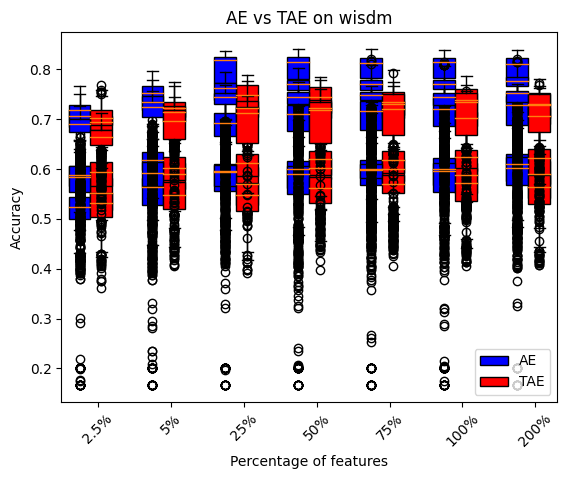

In [220]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'ae') | (all_df['model'] == 'tae')].groupby(['dataset', 'model', 'percent'])):
    # print(index, dataset, model, percent)
    pos_correction = 0 if model == 'ae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['AE', 'TAE'], loc='lower right')
        plt.title('AE vs TAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('ae-vs-tae-' + dataset + '.png', dpi=300)
        plt.show()

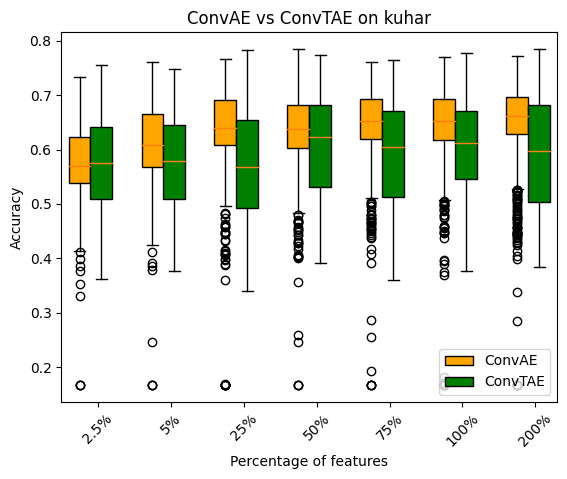

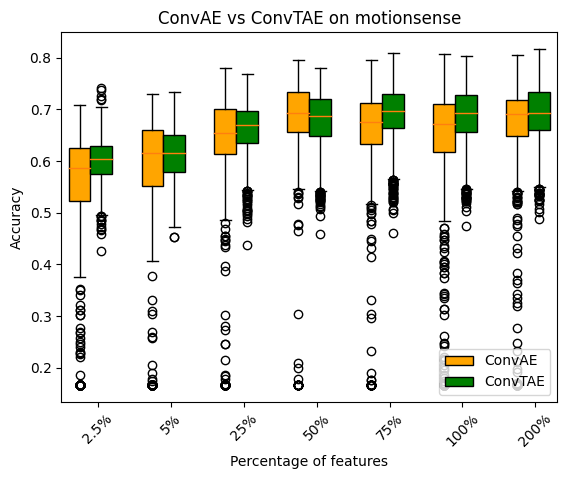

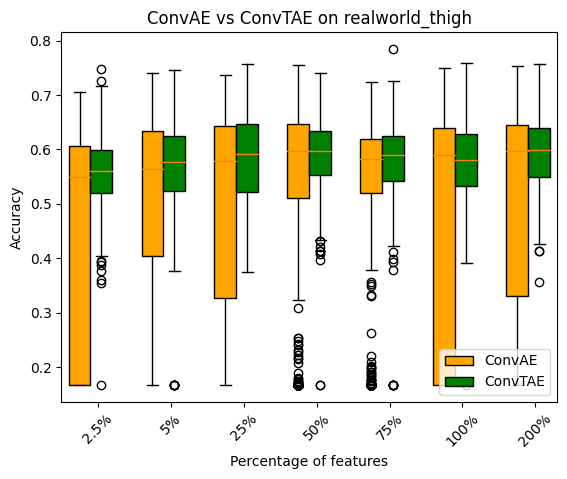

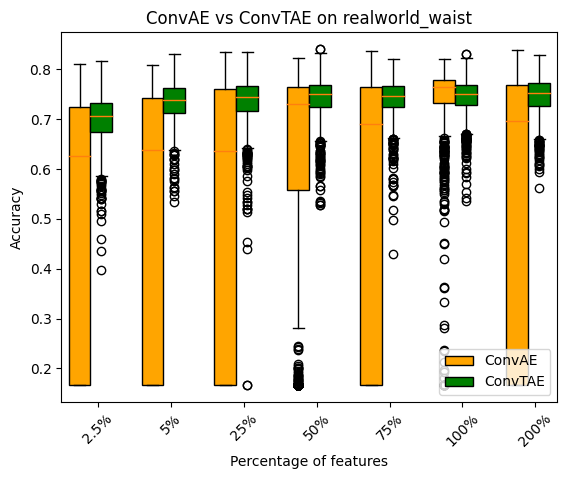

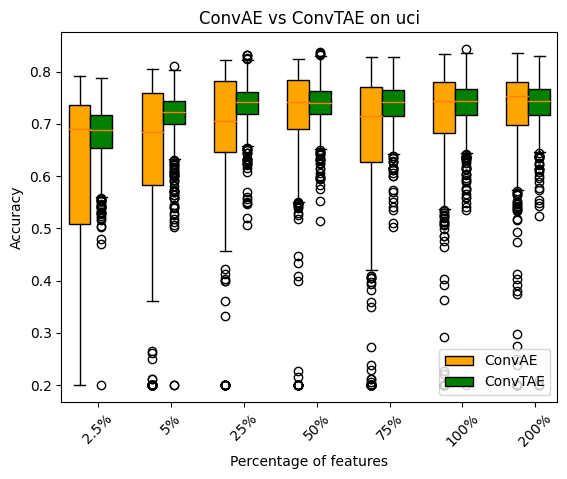

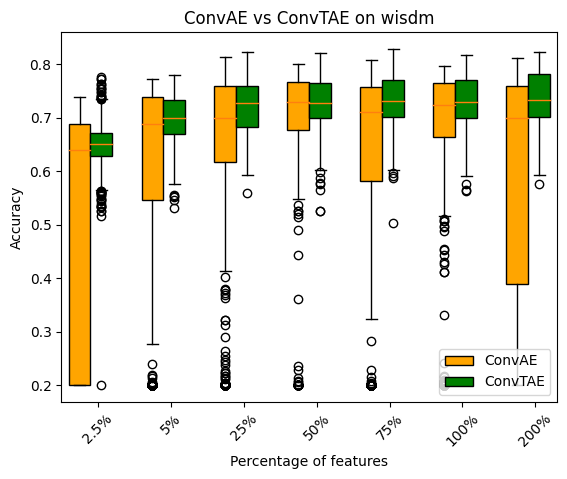

In [224]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'convae') | (all_df['model'] == 'convtae')].groupby(['dataset', 'model', 'percent'])):
    pos_correction = 0 if model == 'convae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['ConvAE', 'ConvTAE'], loc='lower right')
        plt.title('ConvAE vs ConvTAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('convae-vs-convtae-' + dataset + '.png', dpi=300)
        plt.show()


## AE vs ConvAE

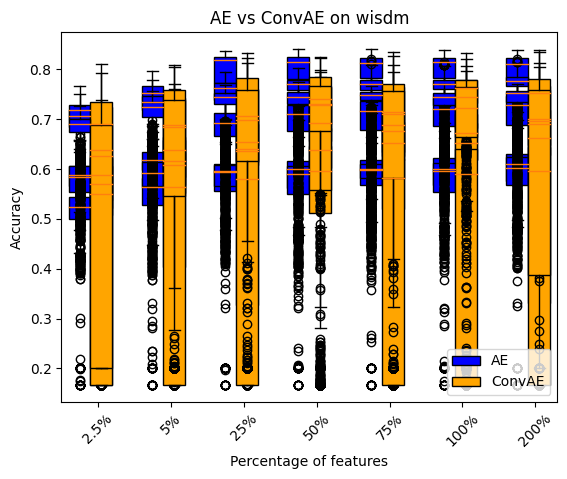

In [222]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'ae') | (all_df['model'] == 'convae')].groupby(['dataset', 'model', 'percent'])):
    # print(index, dataset, model, percent)
    pos_correction = 0 if model == 'ae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['AE', 'ConvAE'], loc='lower right')
        plt.title('AE vs ConvAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('ae-vs-convae-' + dataset + '.png', dpi=300)
        plt.show()

## TAE v ConvTAE

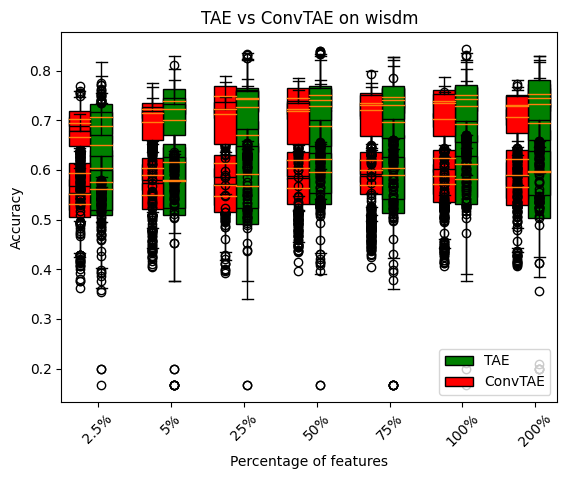

In [223]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'tae') | (all_df['model'] == 'convtae')].groupby(['dataset', 'model', 'percent'])):
    # print(index, dataset, model, percent)
    pos_correction = 0 if model == 'tae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['TAE', 'ConvTAE'], loc='lower right')
        plt.title('TAE vs ConvTAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('tae-vs-convtae-' + dataset + '.png', dpi=300)
        plt.show()